# Heart disease detection 

In [5]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_rel
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## Load Dataset

In [6]:
# LOAD DATASET

def get_df(path):
    df = pd.read_csv(path) 
    return df

df_path = "../../datasets/heart-disease.csv"

df = get_df(df_path)

display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exercise 1

In [7]:
# Definir X (features) e Y (target)
X = df.drop(columns=['target'])
y = df['target']

 
#EX1A
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

knn_scores = cross_val_score(knn, X, y, cv=skf)
nb_scores = cross_val_score(nb, X, y, cv=skf)


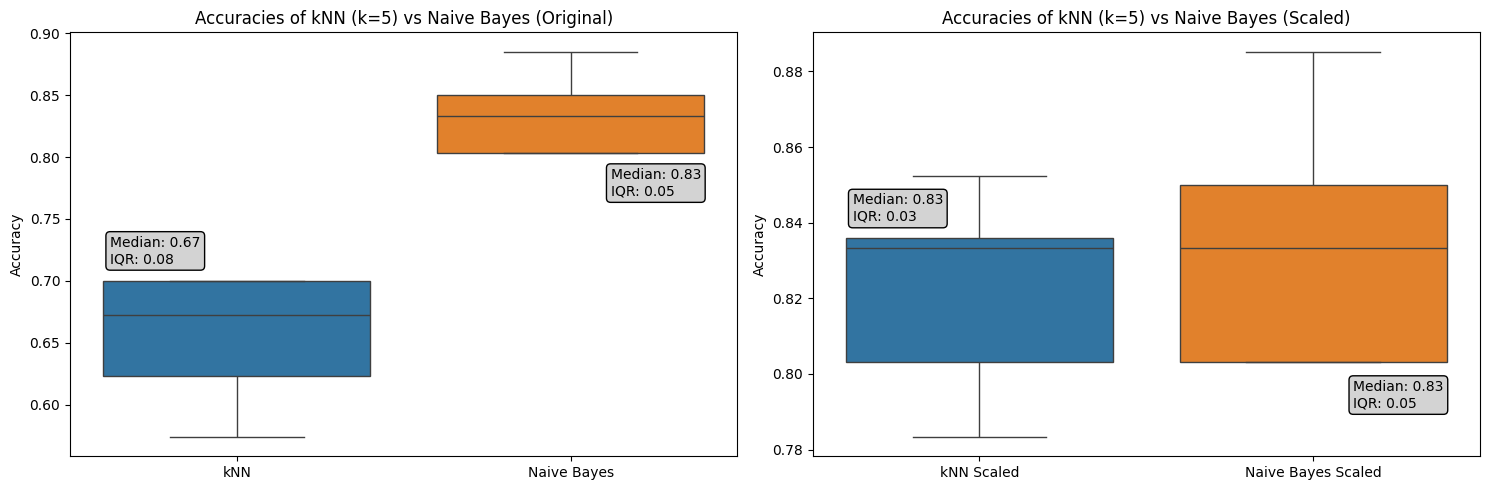

In [8]:
#EX1B

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply the same cross-validation process with scaled data
knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=skf)
nb_scores_scaled = cross_val_score(nb, X_scaled, y, cv=skf)



# Side by side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Função para adicionar a caixa com a mediana e IQR em diferentes posições
def add_iqr_and_median_box(ax, data, positions):
    for i, scores in enumerate(data):
        # Calcula os quartis e a mediana
        Q1 = np.percentile(scores, 25)
        Q3 = np.percentile(scores, 75)
        median = np.median(scores)
        IQR = Q3 - Q1

        # Texto a ser exibido na caixa
        stats_text = f"Median: {median:.2f}\nIQR: {IQR:.2f}"

        # Posição individual da caixa de cada gráfico
        x_position, y_position = positions[i]

        # Adiciona a caixa ao gráfico
        ax.text(x_position, y_position, stats_text, transform=ax.transAxes,
                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', 
                                                               edgecolor='black', facecolor='lightgray'))



# First Boxplot: original
sns.boxplot(data=[knn_scores, nb_scores], ax=axes[0])
axes[0].set_title('Accuracies of kNN (k=5) vs Naive Bayes (Original)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['kNN', 'Naive Bayes'])
axes[0].set_ylabel('Accuracy')

# Add annotations to the first boxplot (Original)
add_iqr_and_median_box(axes[0], [knn_scores, nb_scores], positions = [(0.06,0.52), (0.81,0.68)])

# Second Boxplo: Min-Max scaled
sns.boxplot(data=[knn_scores_scaled, nb_scores_scaled], ax=axes[1])
axes[1].set_title('Accuracies of kNN (k=5) vs Naive Bayes (Scaled)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['kNN Scaled', 'Naive Bayes Scaled'])
axes[1].set_ylabel('Accuracy')

# Add annotations to the second boxplot (Scaled)
add_iqr_and_median_box(axes[1], [knn_scores_scaled, nb_scores_scaled], positions = [(0.06,0.62), (0.81,0.18)])

plt.tight_layout()
plt.show()

<center>
    Fig. 1 - Boxplots of the accuracies of kNN and Naive Bayes, for scaled (right) and non-scaled (left) values. 


The boxplot on the left indicates that, for the original values, the median accuracy of the kNN classifier is 0.67, which is comparatively lower to that of the Naive Bayes (NB) classifier. The IQR (0.08) shows that there is notable variability in the accuracy scores as well. This hints that in the kNN performance fluctuates significantly across the folds of cross-validation on the original dataset.
Conversely, the NB classifier shows significantly less variability than kNN (IQR = 0.05) and a higher median accuracy of 0.83. The boxplot's lower spread suggests that NB outperforms kNN on the original dataset, with consistent performance throughout cross-validation folds. 

This might be due to the fact that the kNN is a distance-based classifier, which significantly depends on calculating the distances between data points, as will be shown in the demonstration that follows. Because kNN treats all features identically and because different features in the original dataset may have varying scales and units, larger scale features —like cholesterol— dominate and overshadow smaller-scaled ones. Performance declines as a result of this imbalance. NB doesn't rely on distances between data points. It assumes that features are independent and uses probabilistic models (based on conditional probabilities) to classify the data. 

Meanwhile, the rightmost boxplot reveals that once the features are scaled using MinMaxScaler, kNN performs noticeably better. Compared to the initial unscaled data, the median accuracy improved significantly to 0.83. Additionally, the results' distribution is more tightly packed, suggesting a more constant performance throughout the folds (IQR = 0.03). This illustrates how the kNN algorithm, which depends on distance metrics and is sensitive to the scale of the data, benefits from scaling.
In contrast, NB shows a marginal drop in median accuracy in comparison to the original dataset. The IQR persists. Given that NB is a probabilistic algorithm, it is not intrinsically dependent on feature scaling, which implies that scaling may not be as beneficial to NB.

In [9]:
#EX1C

t_stat, p_value = ttest_rel(knn_scores_scaled, nb_scores_scaled)

print(f"T-statistic: {t_stat}, p-value: {p_value}" '\n')
if p_value < 0.05:
    print('Since p_value < 0.05, we reject the null hypothesis concluding that the kNN algorithm is statistically superior.')
else:
    print('Since p_value > 0.05, we do not reject the null hypothesis concluding that the kNN algorithm is not statistically superior.')

print('In this case, due to the nature of the utilized function, we are considering the null hypothesis where the two samples have identical average values.')

# If p-value < 0.05, we reject the null hypothesis and conclude kNN is superior


T-statistic: -0.7270523395133756, p-value: 0.5074623897569328

Since p_value > 0.05, we do not reject the null hypothesis concluding that the kNN algorithm is not statistically superior.
In this case, due to the nature of the utilized function, we are considering the null hypothesis where the two samples have identical average values.


## Exercise 2

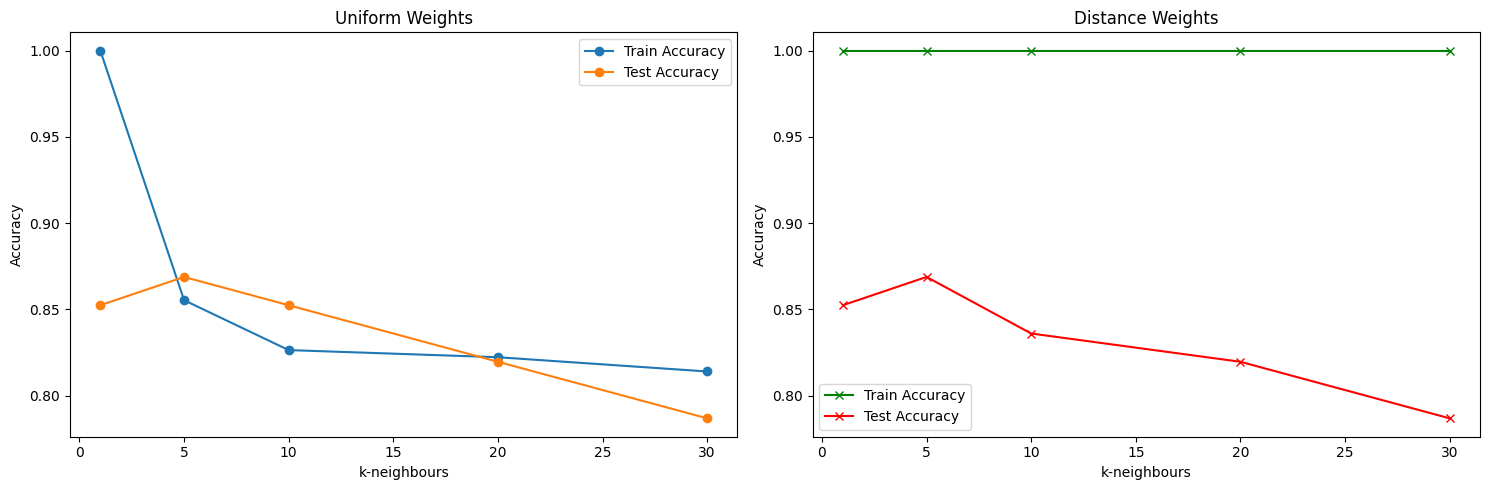

In [11]:
#EX2A

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

ks = [1, 5, 10, 20, 30]

train_acc_uniform = []
test_acc_uniform = []
train_acc_distance = []
test_acc_distance = []

for k in ks:
    
    # For uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    train_acc_uniform.append(knn_uniform.score(X_train, y_train))
    test_acc_uniform.append(knn_uniform.score(X_test, y_test))

    # For distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    train_acc_distance.append(knn_distance.score(X_train, y_train))
    test_acc_distance.append(knn_distance.score(X_test, y_test))
    

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Uniform weights plot
axs[0].plot(ks, train_acc_uniform, label='Train Accuracy', marker='o')
axs[0].plot(ks, test_acc_uniform, label='Test Accuracy', marker='o')
axs[0].set_title('Uniform Weights')
axs[0].set_xlabel('k-neighbours')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Distance weights plot
axs[1].plot(ks, train_acc_distance, color = 'green', label='Train Accuracy', marker='x')
axs[1].plot(ks, test_acc_distance, color = 'red', label='Test Accuracy', marker='x')
axs[1].set_title('Distance Weights')
axs[1].set_xlabel('k-neighbours')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


<center>
    Fig. 2 - Testing vs Treining accuracies for kNN with uniform weights and distance weights

## Exercise 3